# Graph Analysis with Matplotlib

In [2]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

**Data Source:** 

US Government Open Data:

Electric Vehicle Population Data: state of Washington

https://catalog.data.gov/dataset/electric-vehicle-population-data
 

## Introduction

The dataset contains information on electric and plug-in hybrid vehicles registered in Washington state. It includes details such as vehicle identification numbers (VINs), model year, make, model, electric vehicle type, eligibility for clean alternative fuel vehicle (CAFV) incentives, electric range, and geographic details (county, city, and postal code). This dataset can provide insights into electric vehicle adoption patterns and trends across different regions.
.

## Key questions

Key Questions to Explore Visually:

How has the adoption of electric vehicles (EVs) changed over time?

Which vehicle makes and models are the most common in the dataset?

Is there a geographic trend in EV adoption within Washington state?

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Load dataset
file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows
print("First 5 rows:")
print(df.head(5))

First 5 rows:
   VIN (1-10)    County     City State  Postal Code  Model Year     Make  \
0  5YJ3E1EBXK      King  Seattle    WA      98178.0        2019    TESLA   
1  5YJYGDEE3L    Kitsap  Poulsbo    WA      98370.0        2020    TESLA   
2  KM8KRDAF5P    Kitsap   Olalla    WA      98359.0        2023  HYUNDAI   
3  5UXTA6C0XM    Kitsap  Seabeck    WA      98380.0        2021      BMW   
4  JTMAB3FV7P  Thurston  Rainier    WA      98576.0        2023   TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL 3          Battery Electric Vehicle (BEV)   
1     MODEL Y          Battery Electric Vehicle (BEV)   
2     IONIQ 5          Battery Electric Vehicle (BEV)   
3          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicl

### Graph 1: Electric Vehicle Adoption Over Time

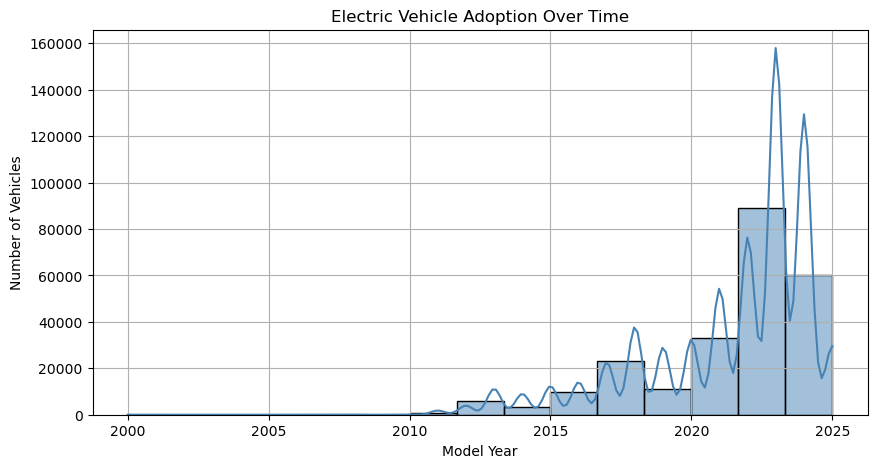

In [11]:
# Create a histogram plot showing the number of electric vehicles by model year.

# Convert model year to numeric
df["Model Year"] = pd.to_numeric(df["Model Year"], errors="coerce")


# Plot EV adoption by year
plt.figure(figsize=(10, 5))
sns.histplot(df["Model Year"], bins=15, kde=True, color="steelblue")

# Labels and title
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.title("Electric Vehicle Adoption Over Time")
plt.grid(True)

# Show the plot
plt.show()


#### Analysis

A histogram (sns.histplot) is used to show the distribution of a single variable. It helps understand how values are spread in a dataset.

The number of registered EVs has increased significantly over time.

There is a noticeable rise in EV adoption after 2015, which may be linked to policy incentives or technological advancements.

### Graph 2: Most Common EV Makes and Models

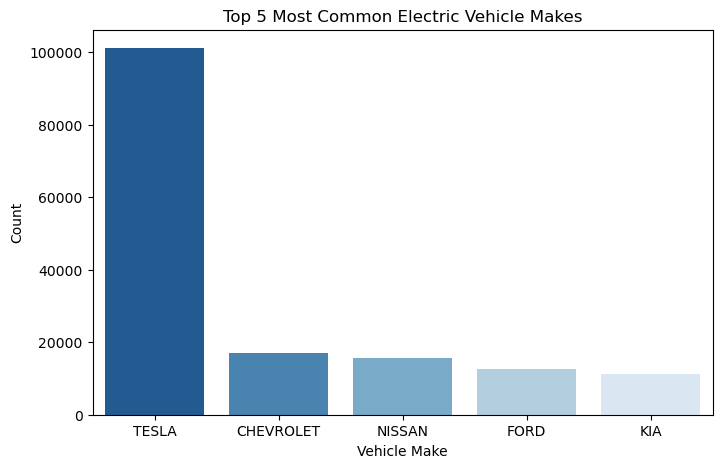

In [14]:
# Create a bar chart showing the most frequently registered electric vehicle makes and models.
# Count vehicle makes
top_makes = df["Make"].value_counts().head(5)

# Plot top 5 vehicle makes
plt.figure(figsize=(8, 5))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="Blues_r")

# Labels and title
plt.xlabel("Vehicle Make")
plt.ylabel("Count")
plt.title("Top 5 Most Common Electric Vehicle Makes")

# Show the plot
plt.show()

#### Analysis
A bar plot (or bar chart) is used to visualize the relationship between categorical variables and the numeric value associated with each category. 
It helps in comparing the sizes of different categories.

Tesla is the most common electric vehicle make in the dataset, followed by BMW and Hyundai.

This suggests that Tesla has a strong presence in the Washington EV market, potentially due to its long-range battery capabilities and brand reputation.

### Graph 3: Geographic Distribution of EVs

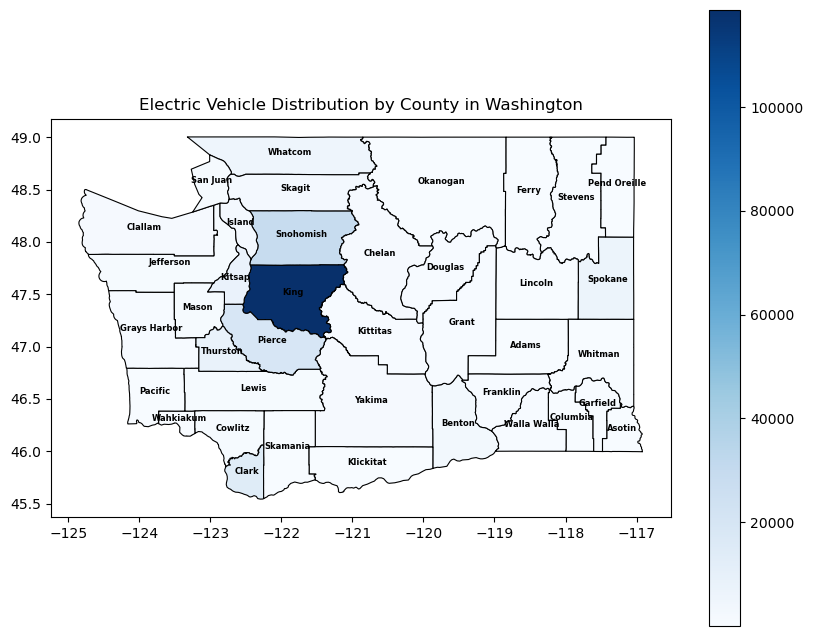

In [17]:
# Analyze geographic trends, create a map of Washington state showing EV counts by county.

import geopandas as gpd

# Load US county shapefile (https://www.census.gov/cgi-bin/geo/shapefiles/index.php)

gdf = gpd.read_file("shapefile/tl_2024_us_county.shp")
# print(gdf.head(3))


# Filter for Washington state
wa_gdf = gdf[gdf["STATEFP"] == "53"]

# Count EVs by county
ev_county = df["County"].value_counts().reset_index()
ev_county.columns = ["County", "EV Count"]

# Merge with geographic data
wa_gdf = wa_gdf.merge(ev_county, left_on="NAME", right_on="County", how="left").fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
wa_gdf.plot(column="EV Count", cmap="Blues", linewidth=0.8, edgecolor="black", legend=True, ax=ax)


# Add county names inside the map, Uses county centroids (geometry.centroid.x, geometry.centroid.y) to place text labels
for x, y, label in zip(wa_gdf.geometry.centroid.x, wa_gdf.geometry.centroid.y, wa_gdf["County"]):
    ax.text(x, y, label, fontsize=6, ha="center", color="black", weight="bold")
    
# Title
plt.title("Electric Vehicle Distribution by County in Washington")

# Show the plot
plt.show()


#### Analysis

Geographic distribution maps visually show how data is distributed across geographic regions (e.g., countries, states, counties, cities). These maps are particularly useful for understanding spatial patterns and regional differences in the data.

King County has the highest number of EVs, while rural areas have lower adoption rates.

## Summary

Through this analysis, I have observed that,

the increasing adoption of electric vehicles, with a sharp rise in recent years.

Tesla dominates the EV market, and EV adoption is higher in urban areas like King County.

These insights highlight the importance of policies promoting EV incentives and expanding charging infrastructure to support further growth in EV adoption